In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'1.5.3'

### DataFrame 구조
- index(row) - column(column) - data

In [4]:
num_list = [10, 20, 30, 40, 50]
pd.DataFrame(num_list)

0
0  10
1  20
2  30
3  40
4  50

In [5]:
double_list = [[1000, '과자','2019-12-31','반품'],
 [2000, '음료', '2020-03-02', '정상'],
 [3000, '아이스크림', '2020-02-03','정상'],
 [1000,'과자','2019-12-31','반품']]
pd.DataFrame(data = double_list)

0      1           2   3
0  1000     과자  2019-12-31  반품
1  2000     음료  2020-03-02  정상
2  3000  아이스크림  2020-02-03  정상
3  1000     과자  2019-12-31  반품

In [6]:
pd.DataFrame(data=double_list, columns=['가격','종류','판매일자','반품여부'])

가격     종류        판매일자 반품여부
0  1000     과자  2019-12-31   반품
1  2000     음료  2020-03-02   정상
2  3000  아이스크림  2020-02-03   정상
3  1000     과자  2019-12-31   반품

In [7]:
double_columns = ['가격','종류','판매일자','반품여부']
df_saledays = pd.DataFrame(data=double_list, columns=double_columns)
df_saledays

가격     종류        판매일자 반품여부
0  1000     과자  2019-12-31   반품
1  2000     음료  2020-03-02   정상
2  3000  아이스크림  2020-02-03   정상
3  1000     과자  2019-12-31   반품

In [8]:
type(df_saledays)

pandas.core.frame.DataFrame

In [9]:
df_saledays_dropcol = df_saledays.drop(columns=['종류', '판매일자',])

In [10]:
df_saledays_dropcol

가격 반품여부
0  1000   반품
1  2000   정상
2  3000   정상
3  1000   반품

In [11]:
len(df_saledays.index)

4

In [12]:
df_saledays.values

array([[1000, '과자', '2019-12-31', '반품'],
       [2000, '음료', '2020-03-02', '정상'],
       [3000, '아이스크림', '2020-02-03', '정상'],
       [1000, '과자', '2019-12-31', '반품']], dtype=object)

In [13]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
pd.Series(data=single_data)

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [14]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
series_floats = pd.Series(data=single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [15]:
type(series_floats)

pandas.core.series.Series

In [16]:
df_saledays_dropcol

가격 반품여부
0  1000   반품
1  2000   정상
2  3000   정상
3  1000   반품

In [17]:
## 필터
# condition = df_saledays_dropcol["반품여부"] == '정상'
condition = (df_saledays["가격"] >= 2500)
df_saledays.loc[condition]

가격     종류        판매일자 반품여부
2  3000  아이스크림  2020-02-03   정상

In [18]:
(df_saledays["가격"] >= 2500) | (df_saledays["가격"] <= 1000) # 특정 범위 선택할 때 사용

0     True
1    False
2     True
3     True
Name: 가격, dtype: bool

In [19]:
(df_saledays["반품여부"] == '정상') & (df_saledays["가격"] >= 2500)

0    False
1    False
2     True
3    False
dtype: bool

## 요약

In [20]:
df_saledays_dropcol.pivot_table(index='반품여부', values='가격')

가격
반품여부      
반품    1000
정상    2500

In [21]:
pd.pivot_table(df_saledays_dropcol, index='반품여부', values='가격')

가격
반품여부      
반품    1000
정상    2500

In [22]:
pd.pivot_table(df_saledays_dropcol, index='반품여부', values='가격', aggfunc=np.sum)

가격
반품여부      
반품    2000
정상    5000

### 통계 수치 표현

In [23]:
import numpy as np

In [24]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
single_floats = pd.Series(single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [25]:
arr = np.array([6, 4, 1, 3, 5, 3, 10, 7, 9])
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [26]:
np.mean(arr)

5.333333333333333

In [27]:
np.std(arr)

2.788866755113585

In [28]:
np.median(arr)

5.0

In [29]:
## 최소값, 최대값
np.min(arr), np.max(arr)

(1, 10)

In [30]:
np.var(arr)

7.777777777777778

In [31]:
np.sum(arr)

48

In [32]:
df_saledays.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size])

sum  amin size
              가격    가격   가격
반품여부 종류                    
반품   과자     2000  1000    2
정상   아이스크림  3000  3000    1
     음료     2000  2000    1

In [46]:
df_saledays.transpose()

0           1           2           3
가격          1000        2000        3000        1000
종류            과자          음료       아이스크림          과자
판매일자  2019-12-31  2020-03-02  2020-02-03  2019-12-31
반품여부          반품          정상          정상          반품
가격차이         750         250        1250         750

In [34]:
def mean_subtraction(cell_value):
    result = abs(1750 - cell_value)
    return result

In [35]:
df_saledays['가격'].apply(mean_subtraction)

0     750
1     250
2    1250
3     750
Name: 가격, dtype: int64

In [36]:
df_saledays.loc[:,['가격차이']] = mean_subtraction(df_saledays['가격'])
df_saledays

C:\Users\5-18\AppData\Local\Temp\ipykernel_12280\222580083.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_saledays.loc[:,['가격차이']] = mean_subtraction(df_saledays['가격'])


가격     종류        판매일자 반품여부  가격차이
0  1000     과자  2019-12-31   반품   750
1  2000     음료  2020-03-02   정상   250
2  3000  아이스크림  2020-02-03   정상  1250
3  1000     과자  2019-12-31   반품   750

### IQR

In [37]:
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [38]:
Q1 = np.percentile(data, 25)

In [39]:
Q3 = np.percentile(data, 75)

In [40]:
Q1, Q3

(33.0, 48.25)

In [41]:
Q3 - Q1

15.25

In [42]:
np.median(data)

44.5

In [43]:
import seaborn as sns
import matplotlib as plt

<Axes: >

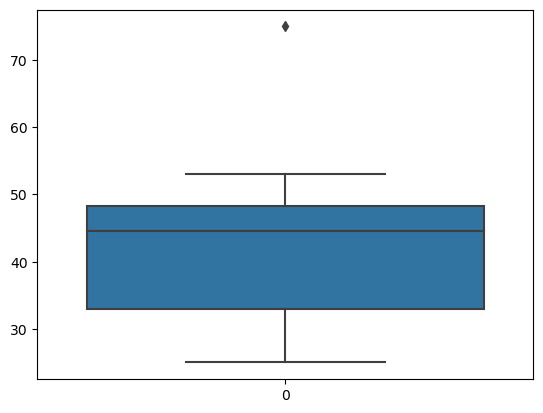

In [44]:
sns.boxplot(data=data)